
## Exercise

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

    * Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
    * Plot bar charts showing impact of employee salaries on retention
    * Plot bar charts showing corelation between department and employee retention
    * Now build logistic regression model using variables that were narrowed down in step 1
    Measure the accuracy of the model



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df['left'].unique()

array([1, 0])

In [9]:
df.shape

(14999, 10)

## Data Exploration

In [18]:
# Count occurrences of 1 and 0 in the 'left' column
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

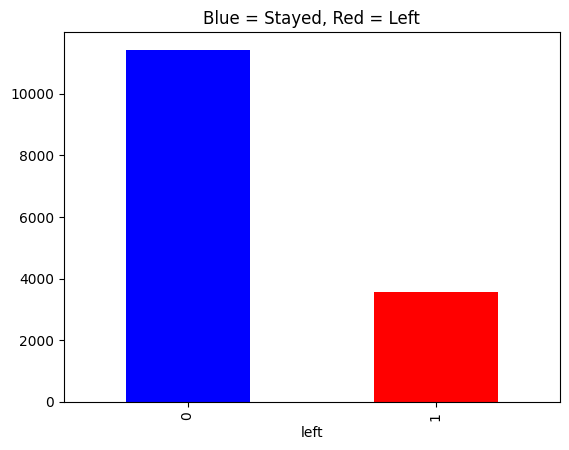

In [20]:
counts = df['left'].value_counts()
counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Blue = Stayed, Red = Left')
plt.show()

In [17]:
numeric = df.select_dtypes(include='number')
numeric.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321




From above table we can draw following conclusions,

    * Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
    * Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
    * Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm



<Axes: xlabel='salary'>

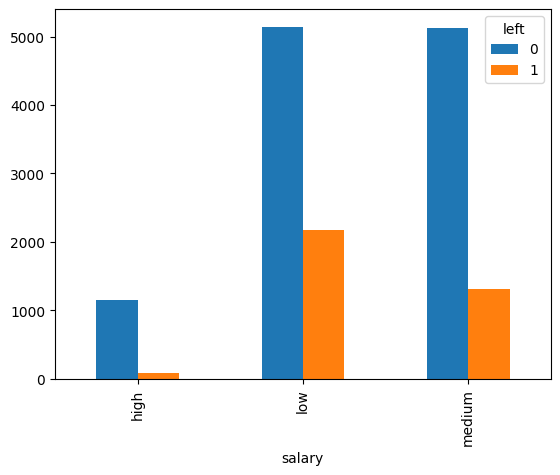

In [22]:
# Impact of Salary on Retention
pd.crosstab(df['salary'], df['left']).plot(kind='bar')
# bar chart shows employees with high salaries are likely to not leave the company


<Axes: ylabel='Department'>

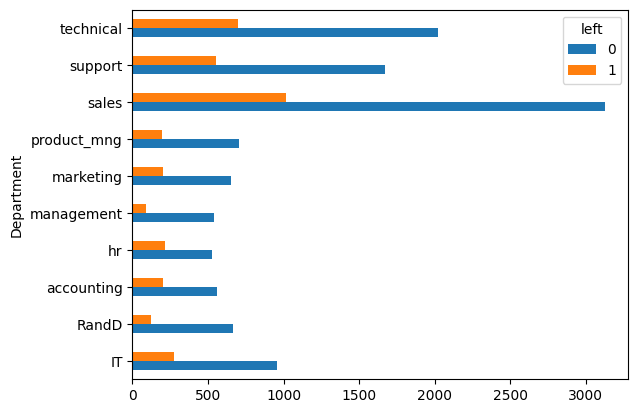

In [24]:
# Retention acros departments
pd.crosstab(df['Department'], df['left']).plot(kind='barh')
# Folks in Sales and Technical departments are more mobile
# We will not consider department in our analysis


# From the data analysis so far we can conclude that we will use following variables as independant variables in our model

* **Satisfaction Level**
* **Average Monthly Hours**
* **Promotion Last 5 Years**
* **Salary**



In [25]:
new_df = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
new_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low




#### Handlw salary dummy variable

* Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.


In [27]:
salary_dummies = pd.get_dummies(new_df['salary'], prefix='salary')
salary_dummies

,salary_high,salary_low,salary_medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [29]:
merged_df = pd.concat([new_df, salary_dummies], axis='columns')
merged_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,False,True,False
14995,0.37,160,0,low,False,True,False
14996,0.37,143,0,low,False,True,False
14997,0.11,280,0,low,False,True,False


#### Create X, y variables to feed into model

In [35]:
final_df = merged_df.drop(['salary', 'salary_high'], axis='columns')
X = final_df
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,157,0,True,False
1,0.80,262,0,False,True
2,0.11,272,0,False,True
3,0.72,223,0,True,False
4,0.37,159,0,True,False


In [37]:
y=df['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

#### Create Logistic Model

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.1, random_state=1)
len(X_train)

13499

In [42]:
X.shape

(14999, 5)

In [43]:
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [44]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
model.score(X_test, y_test)

0.7706666666666667